<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementing MDS

Dataset Used: Customer Personality Analysis Dataset on Kaggle

#### 1.1 Introduction to MDS
- Multidimensional Scaling (MDS) is a statistical technique used for dimensionality reduction. It helps in visualizing the level of similarity of individual cases of a dataset.
- MDS is particularly useful in the context of recommender systems as it can help to visualize the similarities and differences in user preferences based on their interactions with products or content.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
    # upload the file
uploaded = files.upload()

Saving Customer_Segement.zip to Customer_Segement (1).zip


In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/Customer_Segement.zip'

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Listing the contents of the extracted folder to find the dataset file
extracted_files = os.listdir('/content')
extracted_files


['.config',
 'marketing_campaign.csv',
 'Customer_Segement (1).zip',
 'Customer_Segement.zip',
 'sample_data']

In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/marketing_campaign.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset for initial exploration
data.head()


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [ ]:
# Reload the dataset with the correct delimiter
data = pd.read_csv(dataset_path, delimiter='\t')

# Display the first few rows of the dataset for initial exploration
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



###  Data Exploration and Cleaning

1. **Data Exploration**:
    - We'll examine the dataset for missing values, outliers, and the distribution of various features.
    - Understanding the types of variables (categorical vs numerical) is crucial for preprocessing.

2. **Data Cleaning**:
    - Addressing missing values, either by filling them with appropriate values or removing the rows/columns.
    - Handling outliers, if any, to ensure they don't skew our analysis.

3. **Feature Selection and Engineering**:
    - Based on our exploration, we'll decide which features are relevant for MDS.
    - We might create new features or modify existing ones to better represent the data.

4. **Normalization of Data**:
    - Since MDS is sensitive to scale, normalizing the data is important to ensure fair representation of all features.


In [ ]:
# Data Exploration

# Checking for missing values
missing_values = data.isnull().sum()

# Summary statistics for numerical features to identify potential outliers
numerical_summary = data.describe()

# Checking the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
categorical_distribution = data[categorical_features].nunique()

missing_values, numerical_summary, categorical_distribution



(ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
 count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
 mean    5592.159821  1968.805804   52247.2513

In [ ]:
from sklearn.impute import SimpleImputer

# Handling Missing Values
# Using median to impute missing values in 'Income'
imputer = SimpleImputer(strategy='median')
data['Income'] = imputer.fit_transform(data[['Income']]).ravel()

# Outlier Analysis and Handling
# Using IQR to identify and handle outliers in 'Income'
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers by capping
data['Income'] = data['Income'].clip(lower=lower_bound, upper=upper_bound)

# Re-checking the statistics for 'Income' after handling missing values and outliers
data['Income'].describe()


count      2240.000000
mean      51865.874554
std       20936.104821
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      117416.250000
Name: Income, dtype: float64

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2




###  Feature Engineering and Selection

1. **Encoding Categorical Variables**:
   - Categorical variables such as `Education` and `Marital_Status` need to be encoded. We'll use one-hot encoding as it's a common approach that creates binary columns for each category.

2. **Feature Selection**:
   - We'll identify relevant features for the MDS analysis. This includes considering customer demographics, purchasing behavior, and interaction with marketing campaigns.
   - We'll exclude features that may not be relevant or could introduce bias, such as `ID`, `Z_CostContact`, `Z_Revenue`.

3. **Creating New Features** (if needed):
   - Based on the existing data, we might create new features that could provide more insights, such as total spending, average spending per category, etc.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encoding Categorical Variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Creating a DataFrame for the encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical,
                                      columns=encoder.get_feature_names_out(categorical_features))

# Feature Selection
# Removing irrelevant features
features_to_exclude = ['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer']
# Re-defining selected_features by excluding irrelevant and categorical features
selected_features = data.drop(columns=features_to_exclude + list(categorical_features))

# Re-combining the selected features with the encoded categorical variables
processed_data = pd.concat([selected_features, encoded_categorical_df], axis=1)

# Displaying the first few rows of the re-corrected processed data
processed_data.head()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Dt_Customer_31-03-2014,Dt_Customer_31-05-2013,Dt_Customer_31-05-2014,Dt_Customer_31-07-2012,Dt_Customer_31-07-2013,Dt_Customer_31-08-2012,Dt_Customer_31-08-2013,Dt_Customer_31-10-2012,Dt_Customer_31-12-2012,Dt_Customer_31-12-2013
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




###  Normalization of Data

Normalizing the data is crucial, especially in our case where we have a mix of different scales and units across various features. Normalization ensures that each feature contributes equally to the analysis.

We'll use the Min-Max normalization technique, which scales the data to a fixed range – usually 0 to 1. This method is often a good choice because it preserves the relationships among the original data values while scaling them within a bounded interval.





In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalization using Min-Max Scaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(processed_data)

# Converting the normalized data back to a DataFrame
normalized_data_df = pd.DataFrame(normalized_data, columns=processed_data.columns)

# Displaying the first few rows of the normalized data
normalized_data_df.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Dt_Customer_31-03-2014,Dt_Customer_31-05-2013,Dt_Customer_31-05-2014,Dt_Customer_31-07-2012,Dt_Customer_31-07-2013,Dt_Customer_31-08-2012,Dt_Customer_31-08-2013,Dt_Customer_31-10-2012,Dt_Customer_31-12-2012,Dt_Customer_31-12-2013
0,0.621359,0.487595,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.592233,0.385647,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.604074,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.215376,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,0.488935,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Applying Multidimensional Scaling (MDS)

Now that our data is preprocessed and normalized, we're ready to apply MDS for dimensionality reduction. This will help us to visualize the data in lower dimensions and can be particularly insightful for understanding customer segments.

In [ ]:
from sklearn.manifold import MDS

# Setting up MDS with 3 components
mds = MDS(n_components=3, random_state=0)

# Applying MDS to the normalized data
mds_transformed_data = mds.fit_transform(normalized_data_df)

# Converting the MDS transformed data back to a DataFrame for visualization
mds_transformed_df = pd.DataFrame(mds_transformed_data, columns=['MDS1', 'MDS2', 'MDS3'])

# Displaying the first few rows of the MDS transformed data
mds_transformed_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,MDS1,MDS2,MDS3
0,0.072631,1.843315,0.801382
1,-1.295161,0.630275,0.026626
2,0.671800,0.439846,1.003344
3,-0.703839,0.585349,0.953370
4,0.349352,-1.171099,-0.943983



### Step 6: Applying Multidimensional Scaling (MDS) in 3D

We'll now apply MDS to reduce the dimensions of our normalized data to 3 dimensions. This process will involve:

1. **Setting Up MDS**: Configuring the MDS with the number of components set to 3.
2. **Fitting the Model**: Applying MDS to the normalized data to extract the reduced-dimensional representation.
3. **Visualization**: After reducing the dimensions, we can attempt a 3D visualization to see the customer segments.





In [ ]:
# Randomly sampling 20% of the data for MDS analysis
sample_size = int(len(normalized_data_df) * 0.20)
mds_sample_data = normalized_data_df.sample(n=sample_size, random_state=0)

# Applying MDS to the sampled data
mds = MDS(n_components=3, random_state=0)
mds_sample_transformed_data = mds.fit_transform(mds_sample_data)

# Converting the MDS transformed data of the sample back to a DataFrame
mds_sample_transformed_df = pd.DataFrame(mds_sample_transformed_data, columns=['MDS1', 'MDS2', 'MDS3'])

# Displaying the first few rows of the MDS transformed data for the sample
mds_sample_transformed_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,MDS1,MDS2,MDS3
0,1.427234,-0.302283,-0.257033
1,0.352469,-0.465180,-0.895453
2,1.593350,-0.397228,1.525743
3,0.300048,1.743736,-1.116446
4,-0.095023,1.796227,0.112421


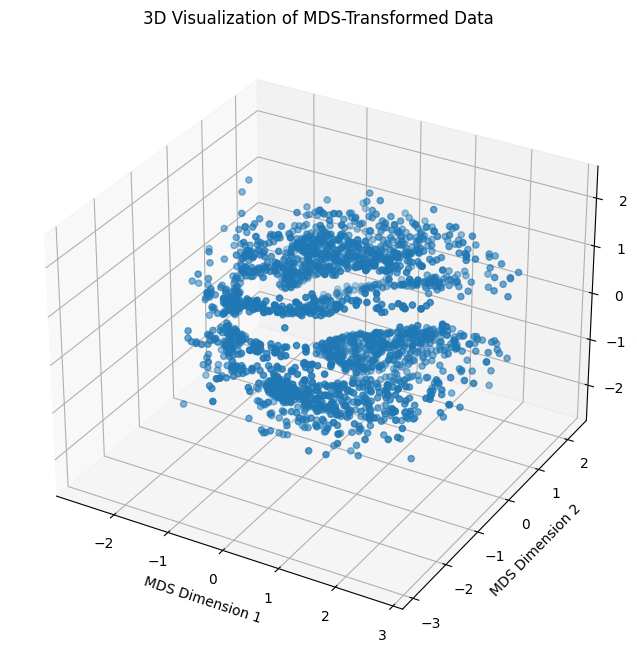

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the MDS-transformed data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3 dimensions
ax.scatter(mds_transformed_df['MDS1'], mds_transformed_df['MDS2'], mds_transformed_df['MDS3'])

ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
ax.set_title('3D Visualization of MDS-Transformed Data')

# Displaying the plot
plt.show()


In [ ]:
|